In [2]:
import numpy as np

In [81]:
data=np.loadtxt('data.csv',delimiter=',')
x=data[:,0].reshape(-1,1)
y=data[:,1]
x.shape
x_train=x

In [82]:
x=np.c_[x,np.ones((data.shape[0],1))]
x.shape

(100, 2)

In [80]:
from sklearn import preprocessing
scaler=preprocessing.StandardScaler()
x_scaled=scaler.fit(x)
x_scaled=scaler.transform(x)
x=x_scaled
# for every feature , mean will be 0 and variance will be 1 
# axis 0 means along each column i.e for each feature

In [83]:
def sg(lr,numIter,m):
    new_slope=np.zeros(x.shape[1])
    M=x.shape[0]
    for i in range(M):
        for j in range(x.shape[1]):
            curr=x[i][j]
            output=y[i]
            new_slope[j]=(-2/M)*(output- (m * x[i]).sum()) * curr
    m = m - lr * new_slope
    return m

def gd(lr,numIter,m):
    for i in range(numIter):
        m=sg(lr,numIter,m)
    return m

def run():
    lr=0.0001
    numIter=1000
    m=np.zeros(x.shape[1])
    m=gd(lr,numIter,m)
    print(m)
    return m  

In [76]:
m,c=run()

[1.524846   0.06068197]


1.5248459967635082 0.060681971799628164


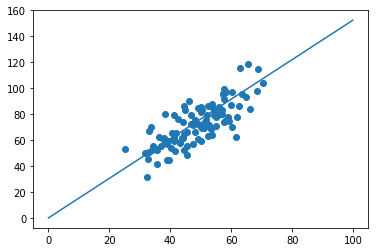

In [84]:
import matplotlib.pyplot as plt
print(m,c)
x_line=np.arange(0,100,0.1)
y_line= m * x_line + c
plt.plot(x_line,y_line)
plt.scatter(data[:,0],data[:,1])
plt.show()

## Comparison with OLS

In [86]:
from sklearn.linear_model import LinearRegression
algo=LinearRegression()
algo.fit(x_train,y)
algo.coef_[0],algo.intercept_

(1.3224310227553597, 7.991020982270399)

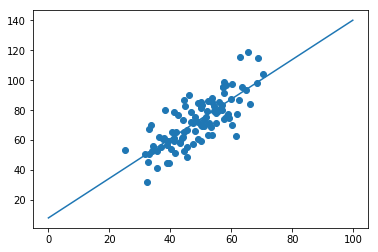

In [87]:
import matplotlib.pyplot as plt
x_line=np.arange(0,100,0.1)
y_line= algo.coef_[0] * x_line + algo.intercept_
plt.plot(x_line,y_line)
plt.scatter(data[:,0],data[:,1])
plt.show()